In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import multivariate_normal#多元正态分布
from sklearn.mixture import GaussianMixture#GMM Gaussian Mixture Model
from sklearn.metrics.pairwise import pairwise_distances_argmin
# %matplotlib tk   # 设置在jupyter中matplotlib的显示情况（默认inline是内嵌显示，通过设置为tk表示不内嵌显示）


# 1,使用scikit携带的EM算法或者自己实现的EM算法
def trainModel(style, x):
    if style == 'sklearn':
        print("sklearn")
        # 对象创建
        g = GaussianMixture(n_components=2, covariance_type='full', tol=1e-6, max_iter=1000, init_params='kmeans')        
        g.fit(x)  # 模型训练        
        print('类别概率:\t', g.weights_[0])  # 效果输出
        print('均值:\n', g.means_, '\n')
        print('方差:\n', g.covariances_, '\n')
        print('似然函数的值:\n', g.lower_bound_)
        mu1, mu2 = g.means_
        sigma1, sigma2 = g.covariances_        
        return (mu1, mu2, sigma1, sigma2)  # 返回数据
    
    else:
        num_iter = 100  # 自己实现一个EM算法
        n, d = data.shape
                
        mu1 = data.min(axis=0)  # 初始化均值和方差正定矩阵
        mu2 = data.max(axis=0)
        sigma1 = np.identity(d)
        sigma2 = np.identity(d)
        pi = 0.5
                
        for i in range(num_iter):  # 实现EM算法            
            norm1 = multivariate_normal(mu1, sigma1)  # E Step:计算获得多元高斯分布的概率密度函数
            norm2 = multivariate_normal(mu2, sigma2)
            tau1 = pi * norm1.pdf(data)
            tau2 = (1 - pi) * norm2.pdf(data)
            gamma = tau1 / (tau1 + tau2)
                        
            mu1 = np.dot(gamma, data) / np.sum(gamma)  # M Step
            mu2 = np.dot((1 - gamma), data) / np.sum((1 - gamma))
            sigma1 = np.dot(gamma * (data - mu1).T, data - mu1) / np.sum(gamma)
            sigma2 = np.dot((1 - gamma) * (data - mu2).T, data - mu2) / np.sum(1 - gamma)
            pi = np.sum(gamma) / n
                        
            j = i + 1  # 输出信息
            if j % 10 == 0:
                print (j, ":\t", mu1, mu2)
                
        print ('类别概率:\t', pi)  # 效果输出
        print ('均值:\t', mu1, mu2)
        print ('方差:\n', sigma1, '\n\n', sigma2, '\n')        
    
        return (mu1, mu2, sigma1, sigma2)  # 返回结果

In [2]:
# 2,构建数据：3维数据
np.random.seed(28)
N = 500
M = 250

mean1 = (0, 0, 0)  # 根据给定的均值和协方差矩阵构建数据
cov1 = np.diag((1, 2, 3))
data1 = np.random.multivariate_normal(mean1, cov1, N)  # 产生400条数据

mean2 = (2, 2, 1)  # 产生一个数据分布不均衡的数据集， 100条
cov2 = np.array(((1, 1, 3), (1, 2, 1), (0, 0, 1)))
data2 = np.random.multivariate_normal(mean2, cov2, M)

data = np.vstack((data1, data2))  # 合并data1和data2这两个数据集
y1 = np.array([True] * N + [False] * M)  # 产生数据对应的y值
y2 = ~y1

/home/jesse/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  if sys.path[0] == '':


In [3]:
# 3，训练模型：
style = 'sklearn'  # style = 'self'
mu1, mu2, sigma1, sigma2 = trainModel(style, data)
 
norm1 = multivariate_normal(mu1, sigma1)  # 预测分类（根据均值和方差对原始数据进行概率密度的推测）
norm2 = multivariate_normal(mu2, sigma2)
tau1 = norm1.pdf(data)
tau2 = norm2.pdf(data)

dist = pairwise_distances_argmin([mean1, mean2], [mu1, mu2], metric='euclidean')  # 计算均值的距离，然后根据距离得到分类情况
print ("距离:", dist)
if dist[0] == 0:
    c1 = tau1 > tau2
else:
    c1 = tau1 < tau2
c2 = ~c1

acc = np.mean(y1 == c1)  # 计算准备率
print (u'准确率：%.2f%%' % (100*acc))

sklearn
类别概率:	 0.6582149142275385
均值:
 [[ 0.04866671 -0.01504436  0.02049083]
 [ 1.97954026  1.98931101  0.76387173]] 

方差:
 [[[ 1.01791516  0.0461345  -0.10406129]
  [ 0.0461345   2.16366212  0.02432634]
  [-0.10406129  0.02432634  2.56046739]]

 [[ 0.86644211  1.16248148  1.19792729]
  [ 1.16248148  2.32277543  1.52449099]
  [ 1.19792729  1.52449099  3.61823182]]] 

似然函数的值:
 -5.276168324821074
距离: [0 1]
准确率：88.53%


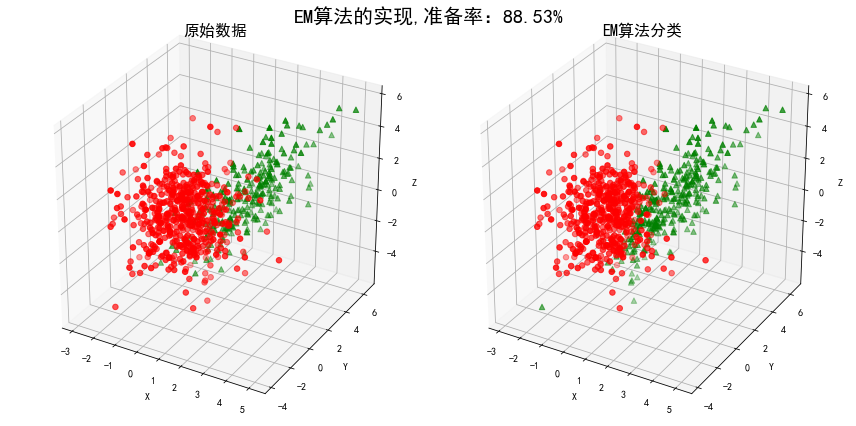

In [4]:
# 4，画图：
fig = plt.figure(figsize=(12, 6), facecolor='w')

ax = fig.add_subplot(121, projection='3d')  # 添加一个子图，设置为3d的
ax.scatter(data[y1, 0], data[y1, 1], data[y1, 2], c='r', s=30, marker='o', depthshade=True)  # 点图
ax.scatter(data[y2, 0], data[y2, 1], data[y2, 2], c='g', s=30, marker='^', depthshade=True)
ax.set_xlabel('X')  # 标签
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'原始数据', fontsize=16)  # 标题

ax = fig.add_subplot(122, projection='3d')  # 再次添加子图，设置为3d
ax.scatter(data[c1, 0], data[c1, 1], data[c1, 2], c='r', s=30, marker='o', depthshade=True)
ax.scatter(data[c2, 0], data[c2, 1], data[c2, 2], c='g', s=30, marker='^', depthshade=True)
ax.set_xlabel('X')  # 设置标签
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(u'EM算法分类', fontsize=16)  # 设置标题

plt.suptitle(u'EM算法的实现,准备率：%.2f%%' % (acc * 100), fontsize=20)  # 设置总标题
plt.subplots_adjust(top=0.90)
plt.tight_layout()
plt.show()